# Analysis

### In this Jupyter Notebook we are going to explore and analyze data from the already processed and cleaned table 'Surveys_prd' located in BigQuery in the Surveys_productive dataset.

#### I use the field with the highest variance, which is 'ConvertedSalary' (Annual salaries in USD of the developers surveyed) and I relate it to the fields 'CompanySize' (Size of the company in number of employees), 'FormalEducation' (Highest formal education at which the surveyed developers arrived), 'CareerSatisfaction' (Level of satisfaction in their own professional career) and 'YearsCoding' (The years they have been coding).


* I identify outliers


* We visualize the distribution of each field


* We visualize the salary distribution for each field


* Calculate the total mean and median, as well as the mean and median for the salary for each of the values of each field

In [1]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a BigQuery client
client = bigquery.Client.from_service_account_json('vasco-data-engineer-mateo-9d05b06c73ff.json', 
                                                   project='vasco-data-engineer-mateo')

# Define the ID of the dataset and the table
dataset_id = 'Surveys_productivo'
table_id = 'surveys_prd'

# Build a reference to the table
table_ref = client.dataset(dataset_id).table(table_id)

# API request - Get the table
table = client.get_table(table_ref)



In [2]:
df = client.list_rows(table).to_dataframe()

In [3]:
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,40435,Yes,Yes,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","5,000 to 9,999 employees",Front-end developer,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,South Asian,18 - 24 years old,No,None,The survey was too long,Neither easy nor difficult
1,26004,Yes,No,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",500 to 999 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,None,South Asian,25 - 34 years old,No,None,The survey was too long,Neither easy nor difficult
2,89959,Yes,Yes,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Fewer than 10 employees,"Back-end developer;C-suite executive (CEO, CTO...",...,I don't typically exercise,Male,Straight or heterosexual,Primary/elementary school,South Asian,25 - 34 years old,No,None,The survey was too long,Neither easy nor difficult
3,85855,Yes,No,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...","10,000 or more employees",QA or test developer,...,Daily or almost every day,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",South Asian,25 - 34 years old,None,None,The survey was too long,Neither easy nor difficult
4,40934,Yes,Yes,India,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Back-end developer;Designer;Full-stack develop...,...,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",South Asian,25 - 34 years old,Yes,None,The survey was too long,Very easy


In [4]:
# remove the 'Respondent' field as it will not be used for analysis
df = df.drop('Respondent', axis=1)


##### We see that the field with the highest standard deviation is 'ConvertedSalary', which is the annual salary in dollars of the respondents.

In [22]:
# The 5 numerical fields with the largest standard deviation
std = df.select_dtypes(include=[np.number]).std()
std.sort_values(ascending=False).head()



ConvertedSalary    231669.903570
AssessBenefits2         2.911387
AssessBenefits6         2.692473
AssessBenefits4         2.686577
AssessJob7              2.677393
dtype: float64

In [17]:
summary = df['ConvertedSalary'].describe()
summary = summary.round(2)
formatted_summary = summary.apply(lambda x: f'{x:,.2f}')
print(formatted_summary)

count          396.00
mean       125,893.28
std        231,669.90
min            130.00
25%         48,953.25
50%         80,000.00
75%        120,000.00
max      2,000,000.00
Name: ConvertedSalary, dtype: object


#### I look for outliers in salaries

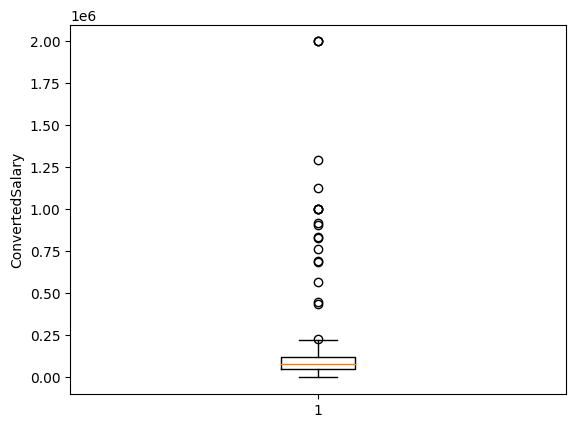

In [14]:
plt.boxplot(df['ConvertedSalary'].dropna())
plt.ylabel('ConvertedSalary')
plt.show()


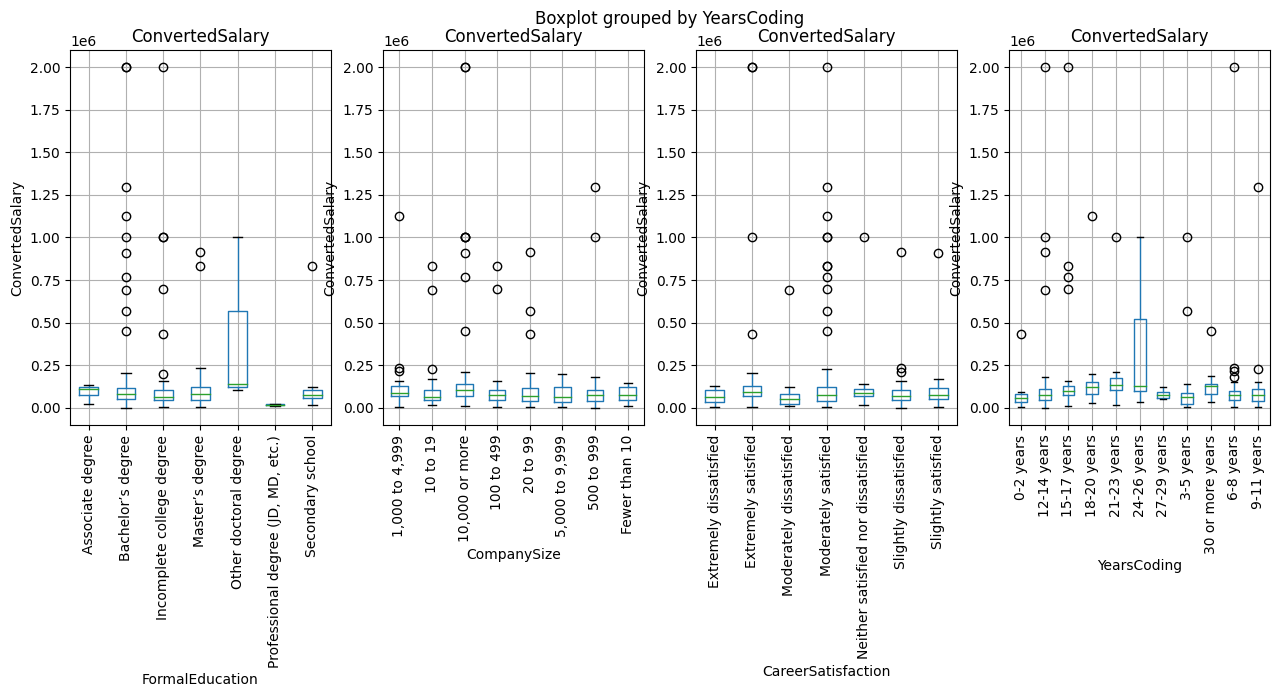

In [24]:
# Crear una lista con las columnas que quieres graficar
cols = ['FormalEducation', 'CompanySize', 'CareerSatisfaction', 'YearsCoding']

# Crear una figura con múltiples subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Iterar sobre las columnas y crear un gráfico de caja para cada una
for i, col in enumerate(cols):
    df.boxplot(column='ConvertedSalary', by=col, ax=axs[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('ConvertedSalary')
    axs[i].tick_params(axis='x', labelrotation=90)

plt.show()


### In the following analyses, we calculate the median and median salary for each field so as not to be biased by autliers that directly affect the median measure.

#### Relationship between the formal education of the developer and the annual salary

In [ ]:
# Replace the values so that when displaying them in the graph it can be seen more clearly
df['FormalEducation'] = df['FormalEducation'].replace({
    "Bachelor’s degree (BA, BS, B.Eng., etc.)": "Bachelor’s degree",
    "Master’s degree (MA, MS, M.Eng., MBA, etc.)": "Master’s degree",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary school",
    "Some college/university study without earning a degree": "Incomplete college degree",
    "Other doctoral degree (Ph.D, Ed.D., etc.)": "Other doctoral degree",
    "Professional degree (JD, MD, etc)": "Professional degree"
})

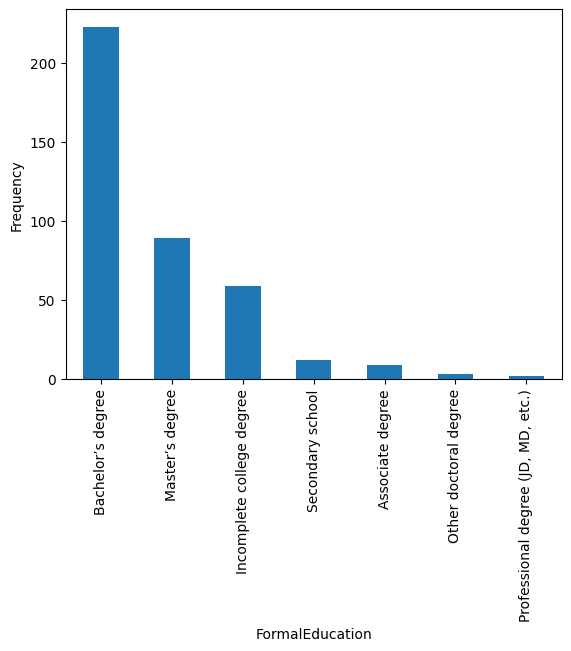

In [47]:
# Distribution of the different levels of formal education
df['FormalEducation'].value_counts().plot(kind='bar')
plt.xlabel('FormalEducation')
plt.ylabel('Frequency')
plt.show()

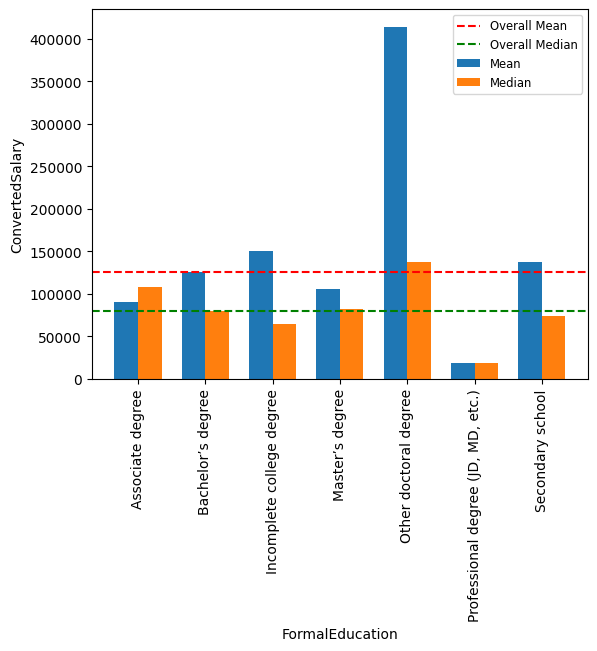

In [44]:
# Calculate the mean and median salary for each value
mean_salary_by_education = df.groupby('FormalEducation')['ConvertedSalary'].mean()
median_salary_by_education = df.groupby('FormalEducation')['ConvertedSalary'].median()

# Set the bar width and positions
bar_width = 0.35
x1 = np.arange(len(mean_salary_by_education))
x2 = [x + bar_width for x in x1]

# Create a grouped bar chart
plt.bar(x1, mean_salary_by_education.values, width=bar_width, label='Mean')
plt.bar(x2, median_salary_by_education.values, width=bar_width, label='Median')
plt.xticks([x + bar_width/2 for x in x1], mean_salary_by_education.index, rotation=90)
plt.xlabel('FormalEducation')
plt.ylabel('ConvertedSalary')
plt.legend()

# Calculate the overall mean and median salary
overall_mean_salary = df['ConvertedSalary'].mean()
overall_median_salary = df['ConvertedSalary'].median()

# Add a red dashed line at the overall mean salary
plt.axhline(overall_mean_salary, color='red', linestyle='--', label='Overall Mean')

# Add a green dashed line at the overall median salary
plt.axhline(overall_median_salary, color='green', linestyle='--', label='Overall Median')

plt.legend(fontsize='small')

plt.show()




#### Relationship between the size of the company (Quantity of employees) where the developer works and the annual salary

In [10]:
df['CompanySize'] = df['CompanySize'].replace({
    "5,000 to 9,999 employees": "5,000 to 9,999",
    "500 to 999 employees": "500 to 999",
    "Fewer than 10 employees": "Fewer than 10",
    "10,000 or more employees": "10,000 or more",
    "100 to 499 employees": "100 to 499",
    "10 to 19 employees": "10 to 19",
    "20 to 99 employees": "20 to 99",
    "1,000 to 4,999 employees": "1,000 to 4,999"
})





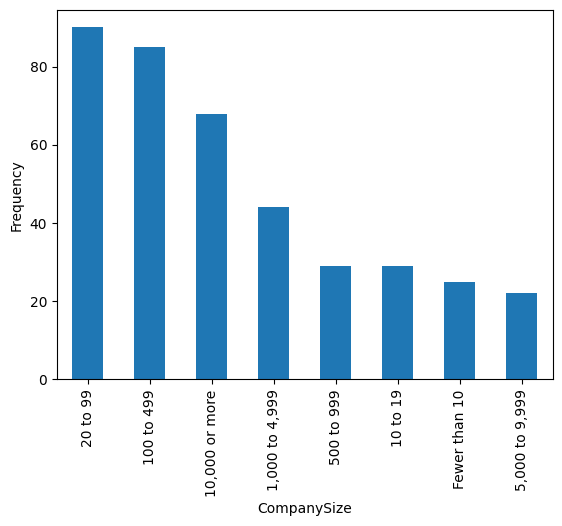

In [46]:
# Distribution of the sizes of the companies where the developer collaborates
df['CompanySize'].value_counts().plot(kind='bar')
plt.xlabel('CompanySize')
plt.ylabel('Frequency')
plt.show()

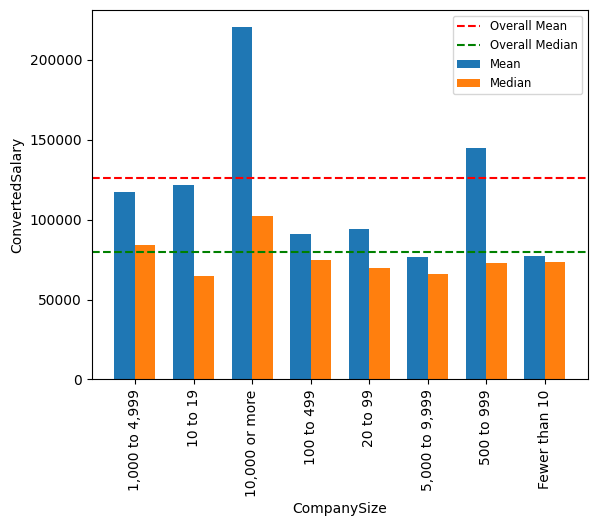

In [43]:
# Calculate the mean and median salary for each value
mean_salary_by_education = df.groupby('CompanySize')['ConvertedSalary'].mean()
median_salary_by_education = df.groupby('CompanySize')['ConvertedSalary'].median()

# Set the bar width and positions
bar_width = 0.35
x1 = np.arange(len(mean_salary_by_education))
x2 = [x + bar_width for x in x1]

# Create a grouped bar chart
plt.bar(x1, mean_salary_by_education.values, width=bar_width, label='Mean')
plt.bar(x2, median_salary_by_education.values, width=bar_width, label='Median')
plt.xticks([x + bar_width/2 for x in x1], mean_salary_by_education.index, rotation=90)
plt.xlabel('CompanySize')
plt.ylabel('ConvertedSalary')
plt.legend()

# Calculate the overall mean and median salary
overall_mean_salary = df['ConvertedSalary'].mean()
overall_median_salary = df['ConvertedSalary'].median()

# Add a red dashed line at the overall mean salary
plt.axhline(overall_mean_salary, color='red', linestyle='--', label='Overall Mean')

# Add a green dashed line at the overall median salary
plt.axhline(overall_median_salary, color='green', linestyle='--', label='Overall Median')

plt.legend(fontsize='small')

plt.show()

#### Relationship between developer satisfaction with his professional career and his annual salary

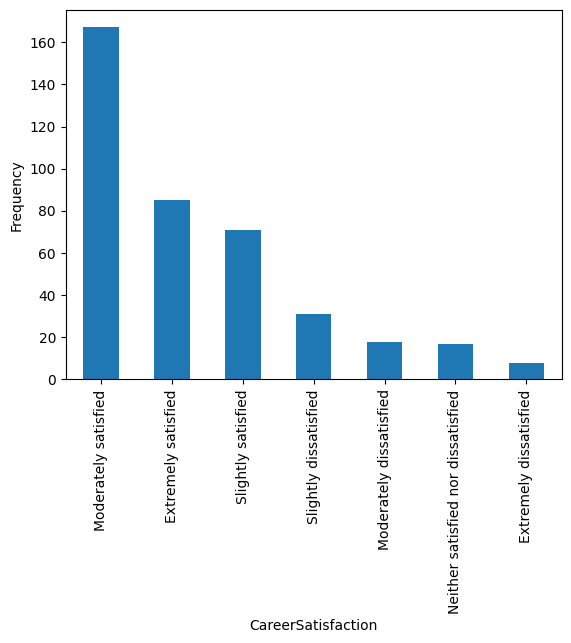

In [45]:
# Distribution of career satisfaction
df['CareerSatisfaction'].value_counts().plot(kind='bar')
plt.xlabel('CareerSatisfaction')
plt.ylabel('Frequency')
plt.show()

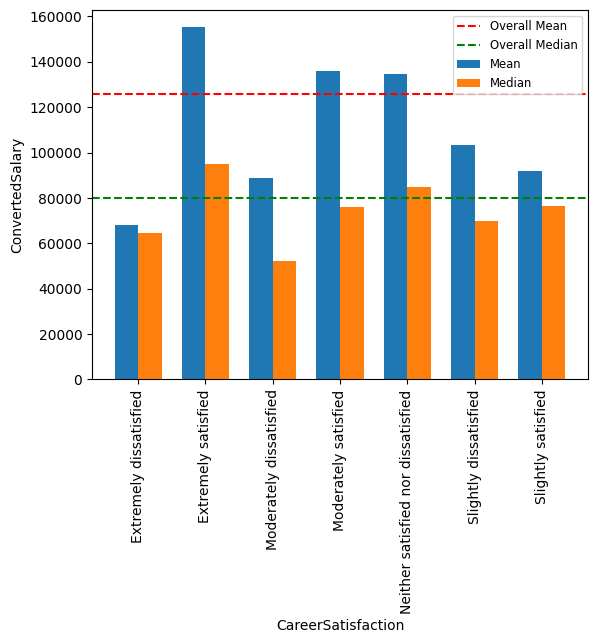

In [41]:
# Calculate the mean and median salary for each value
mean_salary_by_education = df.groupby('CareerSatisfaction')['ConvertedSalary'].mean()
median_salary_by_education = df.groupby('CareerSatisfaction')['ConvertedSalary'].median()

# Set the bar width and positions
bar_width = 0.35
x1 = np.arange(len(mean_salary_by_education))
x2 = [x + bar_width for x in x1]

# Create a grouped bar chart
plt.bar(x1, mean_salary_by_education.values, width=bar_width, label='Mean')
plt.bar(x2, median_salary_by_education.values, width=bar_width, label='Median')
plt.xticks([x + bar_width/2 for x in x1], mean_salary_by_education.index, rotation=90)
plt.xlabel('CareerSatisfaction')
plt.ylabel('ConvertedSalary')
plt.legend()

# Calculate the overall mean and median salary
overall_mean_salary = df['ConvertedSalary'].mean()
overall_median_salary = df['ConvertedSalary'].median()

# Add a red dashed line at the overall mean salary
plt.axhline(overall_mean_salary, color='red', linestyle='--', label='Overall Mean')

# Add a green dashed line at the overall median salary
plt.axhline(overall_median_salary, color='green', linestyle='--', label='Overall Median')

plt.legend(fontsize='small')

plt.show()

#### Relationship between the years that the respondent has been elbowing and his salary

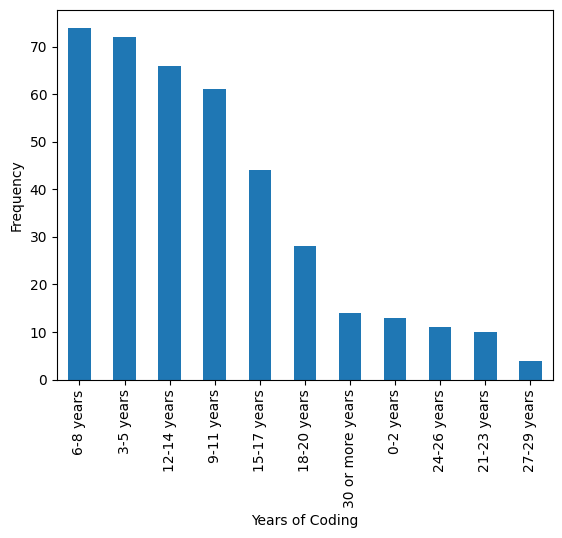

In [24]:
# Distribution of years of code
df['YearsCoding'].value_counts().plot(kind='bar')
plt.xlabel('Years of Coding')
plt.ylabel('Frequency')
plt.show()


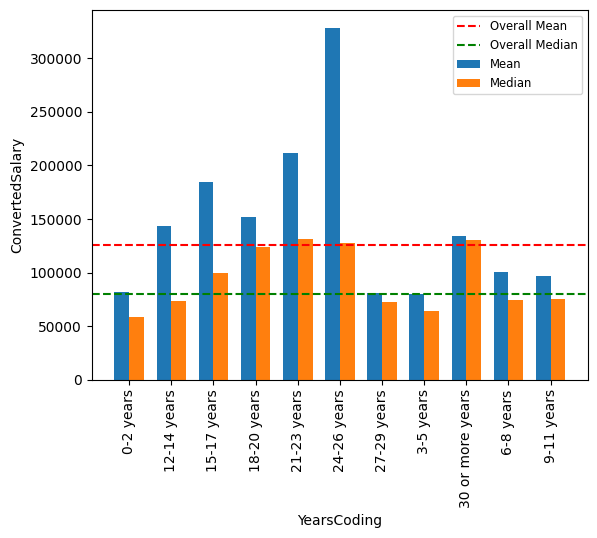

In [42]:
# Calculate the median salary for each value
# Calculate the mean and median salary for each value
mean_salary_by_education = df.groupby('YearsCoding')['ConvertedSalary'].mean()
median_salary_by_education = df.groupby('YearsCoding')['ConvertedSalary'].median()

# Set the bar width and positions
bar_width = 0.35
x1 = np.arange(len(mean_salary_by_education))
x2 = [x + bar_width for x in x1]

# Create a grouped bar chart
plt.bar(x1, mean_salary_by_education.values, width=bar_width, label='Mean')
plt.bar(x2, median_salary_by_education.values, width=bar_width, label='Median')
plt.xticks([x + bar_width/2 for x in x1], mean_salary_by_education.index, rotation=90)
plt.xlabel('YearsCoding')
plt.ylabel('ConvertedSalary')
plt.legend()

# Calculate the overall mean and median salary
overall_mean_salary = df['ConvertedSalary'].mean()
overall_median_salary = df['ConvertedSalary'].median()

# Add a red dashed line at the overall mean salary
plt.axhline(overall_mean_salary, color='red', linestyle='--', label='Overall Mean')

# Add a green dashed line at the overall median salary
plt.axhline(overall_median_salary, color='green', linestyle='--', label='Overall Median')

plt.legend(fontsize='small')

plt.show()

